# Capstone Project

# Topic:- 
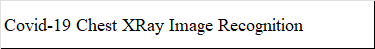 

**Problem Statement:-
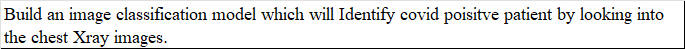**

# General Lifecycle of Image classification project

**1) Data Collection**

**2) Importing libraries**

**3) Data Preprocessing**

**4) Model Building**

**5) Optimizing Model**

**6) Checking/ Vlidating model**

**7) Result**

# Importing all the importanat Library

In [1]:
import matplotlib.pyplot as plt
import cv2
import pathlib
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential

In [28]:
#import imp lib
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
import keras_tuner
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from sklearn.metrics import f1_score,accuracy_score
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Importing Data

### About Dataset
**Context**
Helping Deep Learning and AI Enthusiasts like me to contribute to improving COVID-19 detection using just Chest X-rays.

**Content**
It is a simple directory structure branched into test and train and further branched into the respective 3 classes which contains the images.

**Acknowledgements**
The University of Montreal for releasing the images.

**Inspiration**
Help the medical and researcher community by sharing my work and encourage them to contribute extensively.

In [3]:
img = cv2.imread('C:/Users/Shivam Ranshur/ANACONDA JUPYTER PROGRAMMING/Covid19-dataset/train/Covid/09.png')
img = cv2.resize(img, (255, 255))

img = img / 255.0

(255, 255, 3)

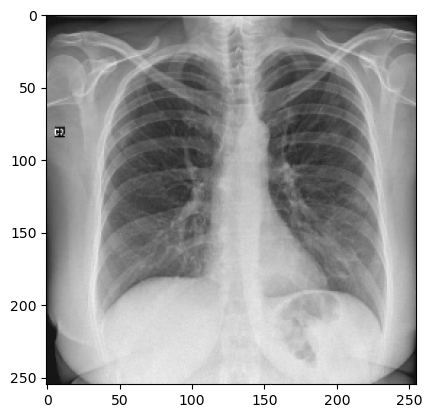

In [4]:
plt.imshow(img)
img.shape

#### Heatmap of xray just to show how covid Xray looks

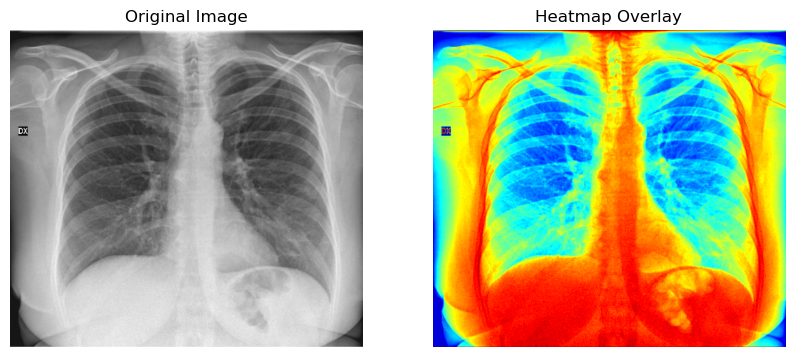

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'C:/Users/Shivam Ranshur/ANACONDA JUPYTER PROGRAMMING/Covid19-dataset/train/Covid/09.png' # Replace with the actual image path
image = cv2.imread(image_path)

# Apply the colormap to the image
heatmap = cv2.applyColorMap(image, cv2.COLORMAP_JET)

# Convert the heatmap to RGB format
heatmap_rgb = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

# Display the original image and the heatmap overlay
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(heatmap_rgb)
axs[1].set_title('Heatmap Overlay')
axs[1].axis('off')

plt.show()


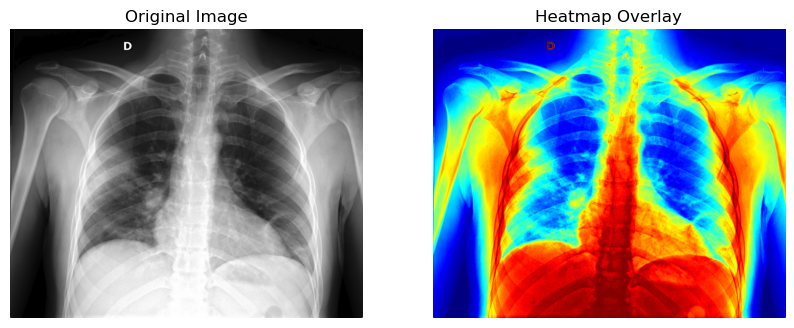

In [6]:
# Load the image
image_path = "C:/Users/Shivam Ranshur/ANACONDA JUPYTER PROGRAMMING/Covid19-dataset/train/Covid/045.jpeg" # Replace with the actual image path
image = cv2.imread(image_path)

# Apply the colormap to the image
heatmap = cv2.applyColorMap(image, cv2.COLORMAP_JET)

# Convert the heatmap to RGB format
heatmap_rgb = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

# Display the original image and the heatmap overlay
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(heatmap_rgb)
axs[1].set_title('Heatmap Overlay')
axs[1].axis('off')

plt.show()


# Data PreProcessing

In [7]:
# we have 251 images in training data which is very less for CNN so we need to do data augmentation
# Data augmentation is a technique to create more data using images we have currently
# we'll do this on training data

## Data Augmentation

In [9]:
# Data augmention is use to generate more data using exixting data
train_data = "C:/Users/Shivam Ranshur/ANACONDA JUPYTER PROGRAMMING/Covid19-dataset/train"
target_size = (256, 256)
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Calculate the total number of samples in the generator
num_samples = len(train_generator) * batch_size
print("Total number of samples in the ImageDataGenerator:", num_samples)

Found 251 images belonging to 3 classes.
Total number of samples in the ImageDataGenerator: 256


**Getting our labels**

In [11]:
# other way is
train_generator.class_indices  # we got our labels of data

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [12]:
# doing same for test data 
# we could have keep same data augmentation code for test and train both , but for everyone to understand i kept it differnt
test_data = "C:/Users/Shivam Ranshur/ANACONDA JUPYTER PROGRAMMING/Covid19-dataset/test"
target_size = (256, 256)
batch_size = 16

test_datagen = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Calculate the total number of samples in the generator
num_samples = len(test_generator) * batch_size
print("Total number of samples in the ImageDataGenerator:", num_samples)

Found 66 images belonging to 3 classes.
Total number of samples in the ImageDataGenerator: 80


In [13]:
test_generator.class_indices # labels for test data

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

# MODEL(CNN)

In [14]:
Xray_model = Sequential()

Xray_model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu",input_shape=(256,256,3)))
Xray_model.add(MaxPool2D())
Xray_model.add(Dropout(rate=0.23))#Dropout is use to prevent overfitting

Xray_model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
Xray_model.add(MaxPool2D())
Xray_model.add(Dropout(rate=0.25))

Xray_model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
Xray_model.add(MaxPool2D())
Xray_model.add(Dropout(rate=0.25))

Xray_model.add(Flatten())
Xray_model.add(Dense(units = 64, activation="relu"))
Xray_model.add(Dropout(rate=0.40))
Xray_model.add(Dense(units=3, activation="softmax"))# 3 inits is used because we have 3 categories

Xray_model.compile(loss="categorical_crossentropy", optimizer= "adam",metrics= ["accuracy"])

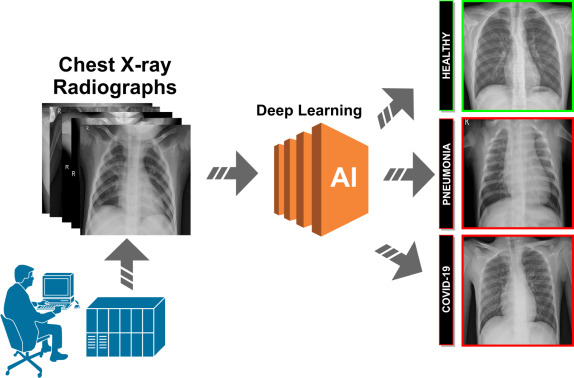

# Model summary

In [15]:
Xray_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

#### Model fitting

In [21]:
Xray_model.fit(train_generator,epochs=20,steps_per_epoch= 8,validation_steps=2)

Epoch 1/20
8/8 [==============================] - 18s 2s/step - loss: 0.3742 - accuracy: 0.8594
Epoch 2/20
8/8 [==============================] - 16s 2s/step - loss: 0.3279 - accuracy: 0.8750
Epoch 3/20
8/8 [==============================] - 17s 2s/step - loss: 0.2922 - accuracy: 0.8750
Epoch 4/20
8/8 [==============================] - 17s 2s/step - loss: 0.3036 - accuracy: 0.8906
Epoch 5/20
8/8 [==============================] - 17s 2s/step - loss: 0.3289 - accuracy: 0.8537
Epoch 6/20
8/8 [==============================] - 17s 2s/step - loss: 0.3425 - accuracy: 0.8984
Epoch 7/20
8/8 [==============================] - 17s 2s/step - loss: 0.2139 - accuracy: 0.9106
Epoch 8/20
8/8 [==============================] - 17s 2s/step - loss: 0.3018 - accuracy: 0.8780
Epoch 9/20
8/8 [==============================] - 17s 2s/step - loss: 0.3151 - accuracy: 0.8906
Epoch 10/20
8/8 [==============================] - 17s 2s/step - loss: 0.4197 - accuracy: 0.9024
Epoch 11/20
8/8 [======================

In [ ]:
# our model is giving  final accuracy of 91.06
#which is fine
#we can optimize model further but it is not always necessary to complicate models 
# if it is working perfectly consuming less computational power
# if while validating it dosent poerform well well optimize it further

In [22]:
y_pred = Xray_model.predict(test_generator)

5/5 [==============================] - 5s 864ms/step


# Validating Model 
**We'll do this by passing images of different categories**

# Labels
# {'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [30]:
test_path= "C:/Users/Shivam Ranshur/ANACONDA JUPYTER PROGRAMMING/Covid19-dataset/train/Covid/09.png"
img= image.load_img(test_path, target_size=(256,256))
img = image.img_to_array(img)/255
img= np.array([img])
print(img.shape)

(1, 256, 256, 3)


In [32]:
# Predict the class probabilities for the image
class_probabilities = Xray_model.predict(img)

# Get the predicted class label
predicted_class = np.argmax(class_probabilities, axis=1)[0]

print("Class Probabilities:", class_probabilities)
print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 276ms/step
Class Probabilities: [[0.98729765 0.01164208 0.00106034]]
Predicted Class: 0


In [34]:
# we can see name in path its normal
test_path= "C:/Users/Shivam Ranshur/ANACONDA JUPYTER PROGRAMMING/Covid19-dataset/test/Normal/0107.jpeg"
img= image.load_img(test_path, target_size=(256,256))
img = image.img_to_array(img)/255
img= np.array([img])
print(img.shape)

# Predict the class probabilities for the image
class_probabilities = Xray_model.predict(img)

# Get the predicted class label
predicted_class = np.argmax(class_probabilities, axis=1)[0]

print("Class Probabilities:", class_probabilities)
print("Predicted Class:", predicted_class)

(1, 256, 256, 3)
1/1 [==============================] - 0s 28ms/step
Class Probabilities: [[4.7880650e-04 6.5907425e-01 3.4044698e-01]]
Predicted Class: 1


In [35]:
# we can see name in path its pneunomia
test_path= "C:/Users/Shivam Ranshur/ANACONDA JUPYTER PROGRAMMING/Covid19-dataset/test/Viral Pneumonia/0119.jpeg"
img= image.load_img(test_path, target_size=(256,256))
img = image.img_to_array(img)/255
img= np.array([img])
print(img.shape)

# Predict the class probabilities for the image
class_probabilities = Xray_model.predict(img)

# Get the predicted class label
predicted_class = np.argmax(class_probabilities, axis=1)[0]

print("Class Probabilities:", class_probabilities)
print("Predicted Class:", predicted_class)

(1, 256, 256, 3)
1/1 [==============================] - 0s 26ms/step
Class Probabilities: [[0.00521721 0.38212913 0.6126536 ]]
Predicted Class: 2


## For all 3 categories its working perfectely as we wanted its classifying perfectly

# RESULT

**Proposed CNN model achieves 91% accuracy in X-ray image classification, effectively detecting COVID-19, normal, and pneumonia cases with high precision.**

**Feel free to use this project and tune it further for your personal projects**